In [34]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [5]:
data_folder = "../../data/"  # Relative path to your data folder

In [7]:
# Get a list of all JSON files in the data folder
json_files = [f for f in os.listdir(data_folder) if f.endswith(".json")]
json_files

['mlb-captions-data-000000000000.json',
 'mlb-captions-data-000000000001.json',
 'mlb-captions-data-000000000002.json',
 'mlb-captions-data-000000000003.json',
 'mlb-captions-data-000000000004.json',
 'mlb-captions-data-000000000005.json',
 'mlb-captions-data-000000000006.json',
 'mlb-captions-data-000000000007.json',
 'mlb-captions-data-000000000008.json',
 'mlb-captions-data-000000000010.json',
 'mlb-captions-data-000000000012.json']

In [10]:
# Initialize a list to hold all captions data
captions_data = []

In [11]:
for file in json_files:
    with open(os.path.join(data_folder, file), 'r') as f:
        # Read line by line since it's JSON Lines format
        for line in f:
            captions_data.append(json.loads(line))  

In [12]:
df = pd.DataFrame(captions_data)

In [13]:
df

,caption_start,caption_end,caption_text,write_date,game_pk,feed_type
0,02:13:28,02:13:42.610000,"And part of my thinking here, Steven Vogt leav...",2024-09-20T07:32:20.420407+00:00,746579,A
1,04:04:23.465000,04:04:23.630000,So.,2024-09-20T07:32:20.420407+00:00,746579,A
2,03:16:07.572000,03:16:07.750000,100.,2024-09-20T07:32:20.420407+00:00,746579,A
3,01:08:21.947000,01:08:22.090000,Now.,2024-09-20T07:32:20.420407+00:00,746579,A
4,00:58:04.797000,00:58:04.960000,One.,2024-09-20T07:32:20.420407+00:00,746579,A
...,...,...,...,...,...,...
540130,00:02:36.756000,00:03:04.650000,39 39ines and countin countinma countinman ys ...,2024-09-29T07:38:36.718884+00:00,746819,H
540131,00:16:10.970000,00:16:22.640000,">> Only Kyle Zimmerman, that was a big he's al...",2024-09-29T07:38:36.718884+00:00,746819,H
540132,01:57:36.816000,01:57:56.080000,And then 'll go Cubs winning the game moneylin...,2024-09-29T07:38:36.718884+00:00,746819,H
540133,00:00:00.483000,00:00:02.550000,San Francisco case Study Program.,2024-09-29T07:40:12.555596+00:00,745281,H


In [15]:
df.isnull().sum()

caption_start    0
caption_end      0
caption_text     0
write_date       0
game_pk          0
feed_type        0
dtype: int64

In [16]:
df['caption_start'] = pd.to_timedelta(df['caption_start'])

In [17]:
df

,caption_start,caption_end,caption_text,write_date,game_pk,feed_type
0,0 days 02:13:28,02:13:42.610000,"And part of my thinking here, Steven Vogt leav...",2024-09-20T07:32:20.420407+00:00,746579,A
1,0 days 04:04:23.465000,04:04:23.630000,So.,2024-09-20T07:32:20.420407+00:00,746579,A
2,0 days 03:16:07.572000,03:16:07.750000,100.,2024-09-20T07:32:20.420407+00:00,746579,A
3,0 days 01:08:21.947000,01:08:22.090000,Now.,2024-09-20T07:32:20.420407+00:00,746579,A
4,0 days 00:58:04.797000,00:58:04.960000,One.,2024-09-20T07:32:20.420407+00:00,746579,A
...,...,...,...,...,...,...
540130,0 days 00:02:36.756000,00:03:04.650000,39 39ines and countin countinma countinman ys ...,2024-09-29T07:38:36.718884+00:00,746819,H
540131,0 days 00:16:10.970000,00:16:22.640000,">> Only Kyle Zimmerman, that was a big he's al...",2024-09-29T07:38:36.718884+00:00,746819,H
540132,0 days 01:57:36.816000,01:57:56.080000,And then 'll go Cubs winning the game moneylin...,2024-09-29T07:38:36.718884+00:00,746819,H
540133,0 days 00:00:00.483000,00:00:02.550000,San Francisco case Study Program.,2024-09-29T07:40:12.555596+00:00,745281,H


In [18]:
df['caption_end'] = pd.to_timedelta(df['caption_end'])
df['duration'] = df['caption_end'] - df['caption_start']  

In [20]:
#Text Cleaning using regex
import re

def clean_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    return text

In [21]:
df['caption_text'] = df['caption_text'].apply(clean_text)

In [22]:
df

,caption_start,caption_end,caption_text,write_date,game_pk,feed_type,duration
0,0 days 02:13:28,0 days 02:13:42.610000,and part of my thinking here steven vogt leavi...,2024-09-20T07:32:20.420407+00:00,746579,A,0 days 00:00:14.610000
1,0 days 04:04:23.465000,0 days 04:04:23.630000,so,2024-09-20T07:32:20.420407+00:00,746579,A,0 days 00:00:00.165000
2,0 days 03:16:07.572000,0 days 03:16:07.750000,,2024-09-20T07:32:20.420407+00:00,746579,A,0 days 00:00:00.178000
3,0 days 01:08:21.947000,0 days 01:08:22.090000,now,2024-09-20T07:32:20.420407+00:00,746579,A,0 days 00:00:00.143000
4,0 days 00:58:04.797000,0 days 00:58:04.960000,one,2024-09-20T07:32:20.420407+00:00,746579,A,0 days 00:00:00.163000
...,...,...,...,...,...,...,...
540130,0 days 00:02:36.756000,0 days 00:03:04.650000,ines and countin countinma countinman ys ysw t...,2024-09-29T07:38:36.718884+00:00,746819,H,0 days 00:00:27.894000
540131,0 days 00:16:10.970000,0 days 00:16:22.640000,only kyle zimmerman that was a big hes always ...,2024-09-29T07:38:36.718884+00:00,746819,H,0 days 00:00:11.670000
540132,0 days 01:57:36.816000,0 days 01:57:56.080000,and then ll go cubs winning the game moneyline...,2024-09-29T07:38:36.718884+00:00,746819,H,0 days 00:00:19.264000
540133,0 days 00:00:00.483000,0 days 00:00:02.550000,san francisco case study program,2024-09-29T07:40:12.555596+00:00,745281,H,0 days 00:00:02.067000


In [23]:
df = df.drop_duplicates(subset=['caption_text'])

In [24]:
df

,caption_start,caption_end,caption_text,write_date,game_pk,feed_type,duration
0,0 days 02:13:28,0 days 02:13:42.610000,and part of my thinking here steven vogt leavi...,2024-09-20T07:32:20.420407+00:00,746579,A,0 days 00:00:14.610000
1,0 days 04:04:23.465000,0 days 04:04:23.630000,so,2024-09-20T07:32:20.420407+00:00,746579,A,0 days 00:00:00.165000
2,0 days 03:16:07.572000,0 days 03:16:07.750000,,2024-09-20T07:32:20.420407+00:00,746579,A,0 days 00:00:00.178000
3,0 days 01:08:21.947000,0 days 01:08:22.090000,now,2024-09-20T07:32:20.420407+00:00,746579,A,0 days 00:00:00.143000
4,0 days 00:58:04.797000,0 days 00:58:04.960000,one,2024-09-20T07:32:20.420407+00:00,746579,A,0 days 00:00:00.163000
...,...,...,...,...,...,...,...
540130,0 days 00:02:36.756000,0 days 00:03:04.650000,ines and countin countinma countinman ys ysw t...,2024-09-29T07:38:36.718884+00:00,746819,H,0 days 00:00:27.894000
540131,0 days 00:16:10.970000,0 days 00:16:22.640000,only kyle zimmerman that was a big hes always ...,2024-09-29T07:38:36.718884+00:00,746819,H,0 days 00:00:11.670000
540132,0 days 01:57:36.816000,0 days 01:57:56.080000,and then ll go cubs winning the game moneyline...,2024-09-29T07:38:36.718884+00:00,746819,H,0 days 00:00:19.264000
540133,0 days 00:00:00.483000,0 days 00:00:02.550000,san francisco case study program,2024-09-29T07:40:12.555596+00:00,745281,H,0 days 00:00:02.067000


In [25]:
df['text_length'] = df['caption_text'].apply(len)  

C:\Users\ashay\AppData\Local\Temp\ipykernel_34780\844080954.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text_length'] = df['caption_text'].apply(len)


In [26]:
df

,caption_start,caption_end,caption_text,write_date,game_pk,feed_type,duration,text_length
0,0 days 02:13:28,0 days 02:13:42.610000,and part of my thinking here steven vogt leavi...,2024-09-20T07:32:20.420407+00:00,746579,A,0 days 00:00:14.610000,253
1,0 days 04:04:23.465000,0 days 04:04:23.630000,so,2024-09-20T07:32:20.420407+00:00,746579,A,0 days 00:00:00.165000,2
2,0 days 03:16:07.572000,0 days 03:16:07.750000,,2024-09-20T07:32:20.420407+00:00,746579,A,0 days 00:00:00.178000,0
3,0 days 01:08:21.947000,0 days 01:08:22.090000,now,2024-09-20T07:32:20.420407+00:00,746579,A,0 days 00:00:00.143000,3
4,0 days 00:58:04.797000,0 days 00:58:04.960000,one,2024-09-20T07:32:20.420407+00:00,746579,A,0 days 00:00:00.163000,3
...,...,...,...,...,...,...,...,...
540130,0 days 00:02:36.756000,0 days 00:03:04.650000,ines and countin countinma countinman ys ysw t...,2024-09-29T07:38:36.718884+00:00,746819,H,0 days 00:00:27.894000,228
540131,0 days 00:16:10.970000,0 days 00:16:22.640000,only kyle zimmerman that was a big hes always ...,2024-09-29T07:38:36.718884+00:00,746819,H,0 days 00:00:11.670000,234
540132,0 days 01:57:36.816000,0 days 01:57:56.080000,and then ll go cubs winning the game moneyline...,2024-09-29T07:38:36.718884+00:00,746819,H,0 days 00:00:19.264000,235
540133,0 days 00:00:00.483000,0 days 00:00:02.550000,san francisco case study program,2024-09-29T07:40:12.555596+00:00,745281,H,0 days 00:00:02.067000,32


## EDA

In [27]:
print("Data Shape:", df.shape)
print("Data Types:\n", df.dtypes)
print("Summary Statistics:\n", df.describe())
print("Unique Values in Columns:\n", df.nunique())

Data Shape: (475972, 8)
Data Types:
 caption_start    timedelta64[ns]
caption_end      timedelta64[ns]
caption_text              object
write_date                object
game_pk                   object
feed_type                 object
duration         timedelta64[ns]
text_length                int64
dtype: object
Summary Statistics:
                    caption_start                caption_end  \
count                     475972                     475972   
mean   0 days 01:53:22.414935525  0 days 01:53:28.283455161   
std    0 days 01:08:04.813504702  0 days 01:08:04.951784055   
min       0 days 00:00:00.166000     0 days 00:00:00.310000   
25%       0 days 00:55:15.562000     0 days 00:55:21.670000   
50%       0 days 01:50:45.413000     0 days 01:50:51.700000   
75%       0 days 02:50:03.096250     0 days 02:50:10.045000   
max       0 days 05:47:51.650000     0 days 05:47:53.650000   

                        duration    text_length  
count                     475972  475972.00000

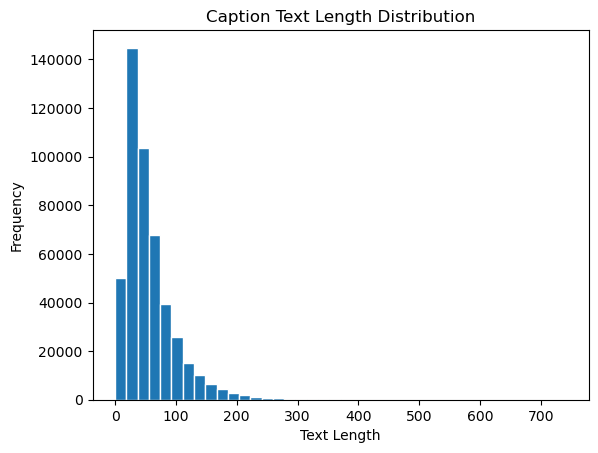

In [32]:
plt.hist(df['text_length'], bins=40, edgecolor='white')
plt.title("Caption Text Length Distribution")
plt.xlabel("Text Length")
plt.ylabel("Frequency")
plt.show()

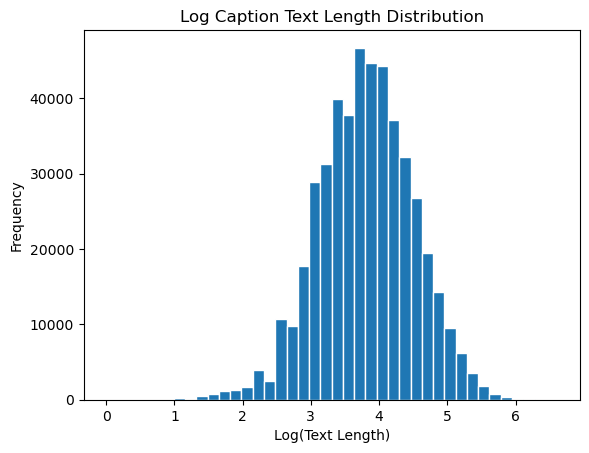

In [35]:
plt.hist(np.log(df['text_length']+1), bins=40, edgecolor='white')
plt.title("Log Caption Text Length Distribution")
plt.xlabel("Log(Text Length)")
plt.ylabel("Frequency")
plt.show()

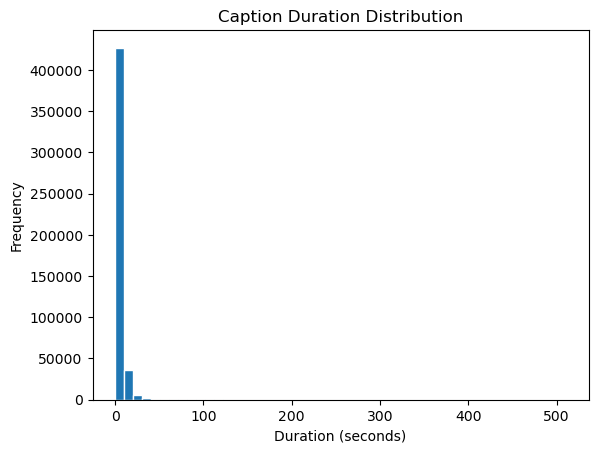

In [38]:
plt.hist(df['duration'].dt.total_seconds(), bins=50, edgecolor='white')
plt.title("Caption Duration Distribution")
plt.xlabel("Duration (seconds)")
plt.ylabel("Frequency")
plt.show()

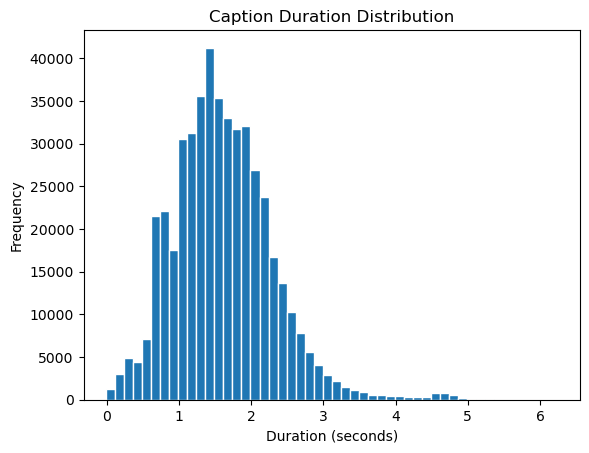

In [39]:
plt.hist(np.log(df['duration'].dt.total_seconds()+1), bins=50, edgecolor='white')
plt.title("Caption Duration Log Distribution")
plt.xlabel("Log(Duration (seconds))")
plt.ylabel("Frequency")
plt.show()

In [42]:
df['game_pk'].nunique()

127

In [43]:
from collections import Counter

all_words = " ".join(df['caption_text']).split()
word_counts = Counter(all_words)
common_words = word_counts.most_common(20)
words, counts = zip(*common_words)

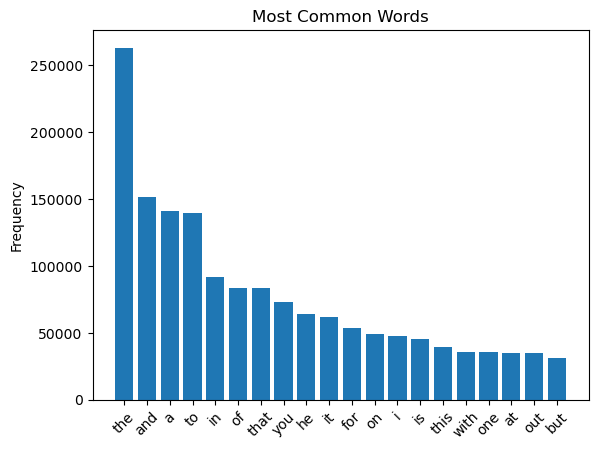

In [44]:
plt.bar(words, counts)
plt.title("Most Common Words")
plt.xticks(rotation=45)
plt.ylabel("Frequency")
plt.show()

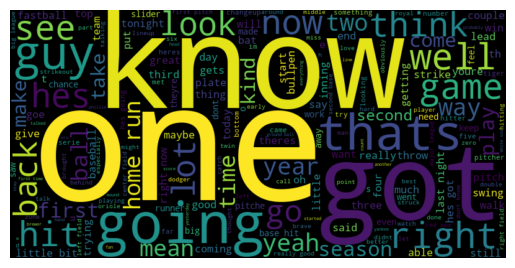

In [47]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400).generate(" ".join(df['caption_text']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

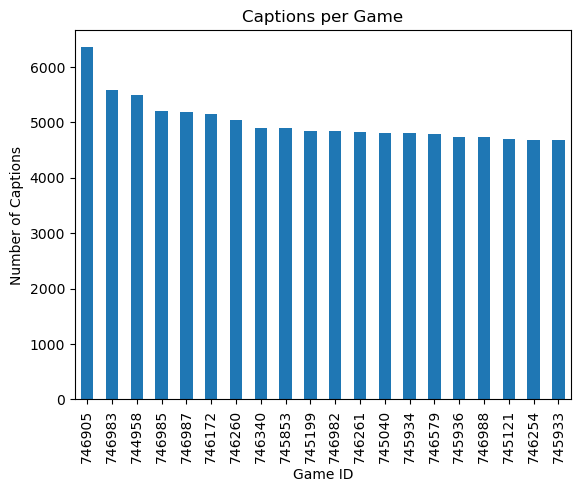

In [48]:
df['game_pk'].value_counts().head(20).plot(kind='bar')
plt.title("Captions per Game")
plt.xlabel("Game ID")
plt.ylabel("Number of Captions")
plt.show()